In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
file = "../data/SSCURVES(1-61).xlsx"
xls = pd.ExcelFile(file)

In [3]:
# Interpolate all data to the data with the shortest x-range

smallest_stress_range = [np.inf, None, None] # [range, idx, number of points]
for sheet in xls.sheet_names:
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    # TODO: Some data MUST be excluded, right? There are dataseries with less than 10 points.
    # I don't believe those could be good...
    if len(df) < 15:
        continue
    low = df['Stress'].min()
    high = df['Stress'].max()
    stress_range = high - low
    if stress_range < smallest_stress_range[0]:
        smallest_stress_range = [stress_range, sheet, len(df)]

print(f"Case {smallest_stress_range[1]} has the shortest stress range of {smallest_stress_range[0]} with {smallest_stress_range[2]} points.")

# X = []
# for sheet in xls.sheet_names:
#     df = pd.read_excel(file, sheet_name=sheet)
#     df = df.dropna(subset=['Strain', 'Stress'])
#     if len(df) < 10:
#         continue
    #  interpolated_stress = np.interp()

Case 32 has the shortest stress range of 0.39937500000000004 with 44 points.


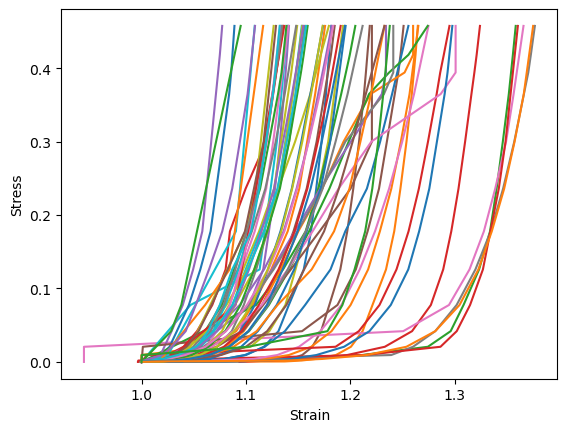

In [4]:
df_list = []
for sheet in xls.sheet_names:
    df_list.append(pd.read_excel(file, sheet_name=sheet))

y_dflist = []
xc = int(smallest_stress_range[1])

for i in range(len(df_list)):
    # df = df_list[i].drop_duplicates(subset=['Stress'])
    # f2 = interp1d(df['Stress'], df['Strain'], kind='cubic')
    # interpolated = f2(df_list[xc]['Stress'])
    interpolated = np.interp(df_list[xc]['Stress'], df_list[i]['Stress'], df_list[i]['Strain'])
    y_dflist.append(interpolated)
    plt.plot(y_dflist[i], df_list[xc]['Stress'],)

plt.ylabel("Stress")
plt.xlabel("Strain")
    

X = np.array(y_dflist)
mu = np.mean(X, axis=0)

In [5]:
components = PCA(n_components=3).fit(X).components_
scores = PCA(n_components=3).fit(X).explained_variance_
mean = PCA(n_components=3).fit(X).mean_

In [6]:
print("components", components)
print("scores", scores)
print("mean", mean)

components [[ 0.00898937  0.04927355  0.04927355  0.08785499  0.11906007  0.1868729
   0.23400093  0.28531582  0.29319867  0.29431079  0.29433471  0.29624028
   0.29812345  0.30148234  0.30273947  0.30304189  0.30307805]
 [-0.1060445  -0.25381183 -0.25381183 -0.33631053 -0.41197709 -0.48856744
  -0.4400614  -0.03956779  0.02359584  0.05198866  0.07513228  0.0978771
   0.12221916  0.15553394  0.16630337  0.16907977  0.17119725]
 [ 0.07282043  0.25843103  0.25843103  0.27234598  0.1374503  -0.00473614
  -0.26509073 -0.40198891 -0.33054794 -0.25015641 -0.17439336 -0.07272501
   0.03769157  0.22073411  0.29399282  0.30880294  0.3109519 ]]
scores [0.05857718 0.00593818 0.00130353]
mean [1.00125921 1.01224451 1.01224451 1.02872717 1.04391639 1.06290297
 1.08523933 1.10979926 1.12753284 1.14455161 1.15784494 1.16958431
 1.17971806 1.18936314 1.19345353 1.19610905 1.19995369]


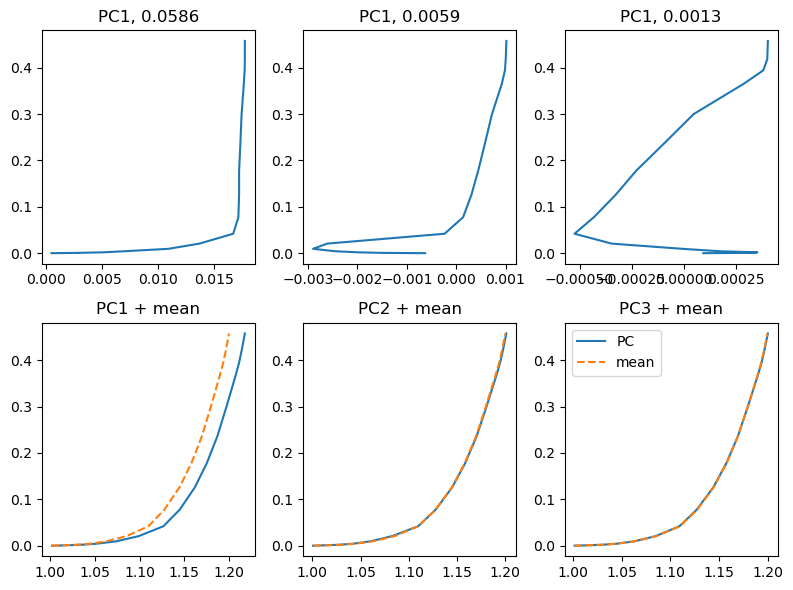

In [20]:
fig = plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(231)
ax.set_title(f"PC1, {scores[0]:.4f}")
ax.plot(scores[0] * components[0], df_list[xc]['Stress'])

ax = fig.add_subplot(232)
ax.set_title(f"PC1, {scores[1]:.4f}")
ax.plot(scores[1] * components[1], df_list[xc]['Stress'])

ax = fig.add_subplot(233)
ax.set_title(f"PC1, {scores[2]:.4f}")
ax.plot(scores[2] * components[2], df_list[xc]['Stress'])

ax = fig.add_subplot(234)
ax.set_title("PC1 + mean")
ax.plot(scores[0] * components[0] + mean, df_list[xc]['Stress'])
ax.plot(mean, df_list[xc]['Stress'], '--')

ax = fig.add_subplot(235)
ax.set_title("PC2 + mean")
ax.plot(scores[1] * components[1] + mean, df_list[xc]['Stress'])
ax.plot(mean, df_list[xc]['Stress'], '--')

ax = fig.add_subplot(236)
ax.set_title("PC3 + mean")
ax.plot(scores[2] * components[2] + mean, df_list[xc]['Stress'], label='PC')
ax.plot(mean, df_list[xc]['Stress'], '--', label='mean')

plt.tight_layout()
plt.legend()

plt.show()

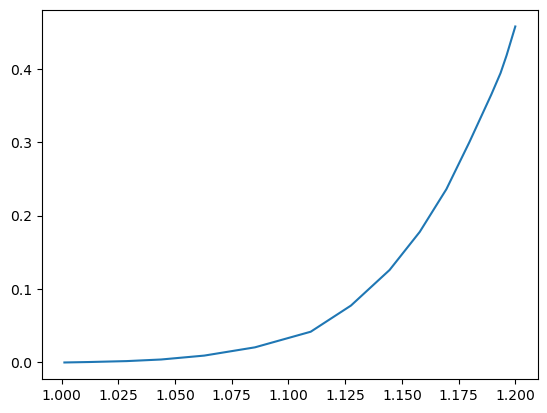

In [9]:
plt.plot(mean, df_list[xc]["Stress"])